In [67]:
# Notebook created solely for the final report based off the prototype and presentation ones.
import polars as pl
from great_tables import GT
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

# FRIENDLY NAMES:
FRIENDLY_NAMES = {
    "C": "C",
    "CXX": "C++",
    "RUST": "RUST",
    "RUST_OOB": "UNSAFE RUST (No Out-of-Bounds)",
    "RUST_RAW": "UNSAFE RUST (Raw Pointers)",
}

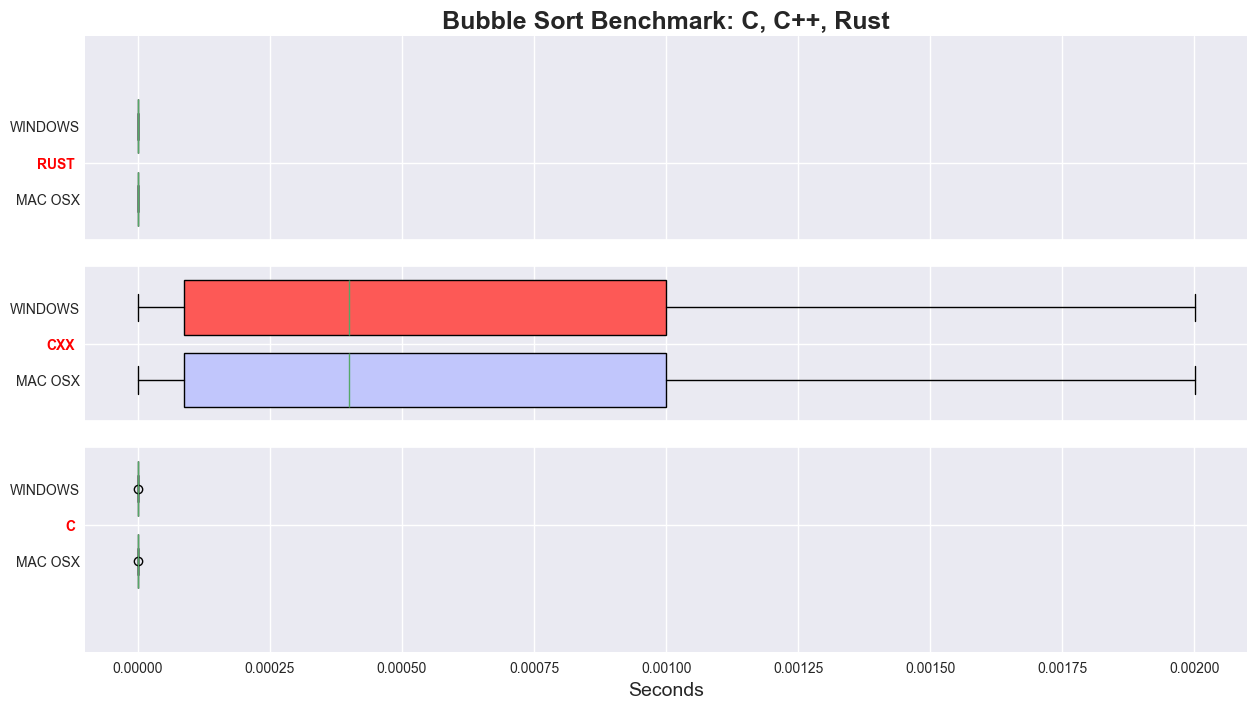

In [4]:
# GRAPH A: A Direct Benchmark Between Rust, C, and C++
df_win32 = pl.read_csv("bubble-win32.csv").select(["RUST", "C", "CXX"])
df_osx = pl.read_csv("bubble-win32.csv").select(["RUST", "C", "CXX"])

fig, ax = plt.subplots(figsize=(15, 8))

win_plot = ax.boxplot(df_win32, orientation="horizontal", patch_artist=True,
           label=["RUST", "C", "C++"], positions=[0.2, 1.2, 2.2], widths=[0.3, 0.3, 0.3])
osx_plot = ax.boxplot(df_win32, orientation="horizontal", patch_artist=True,
           label=["RUST", "C", "C++"], positions=[-0.2, 0.8, 1.8], widths=[0.3, 0.3, 0.3])

for box in win_plot["boxes"]:
    box.set_facecolor("xkcd:grapefruit")

for box in osx_plot["boxes"]:
    box.set_facecolor("xkcd:light periwinkle")

ax.axhline(y=0.5, color="white", lw=20)
ax.axhline(y=1.5, color="white", lw=20)

ax.set_yticks([0.2, -0.2, 1.2, 0.8, 2.2, 1.8], minor=True)
ax.set_yticklabels(["WINDOWS", "MAC OSX", "WINDOWS", "MAC OSX", "WINDOWS", "MAC OSX"],
                   minor=True, fontweight="bold", color="r", fontsize=12)
ax.set_yticks(range(3))
ax.set_yticklabels(["C", "CXX", "RUST"], fontsize=10, color="red", fontweight="bold");
ax.set_title("Bubble Sort Benchmark: C, C++, Rust", fontsize=18, fontweight="bold")
ax.set_xlabel("Seconds", fontsize=14);


PathPatch6((2e-07, 0.05) ...)
PathPatch6((0, 1.05) ...)
PathPatch6((0, 2.05) ...)


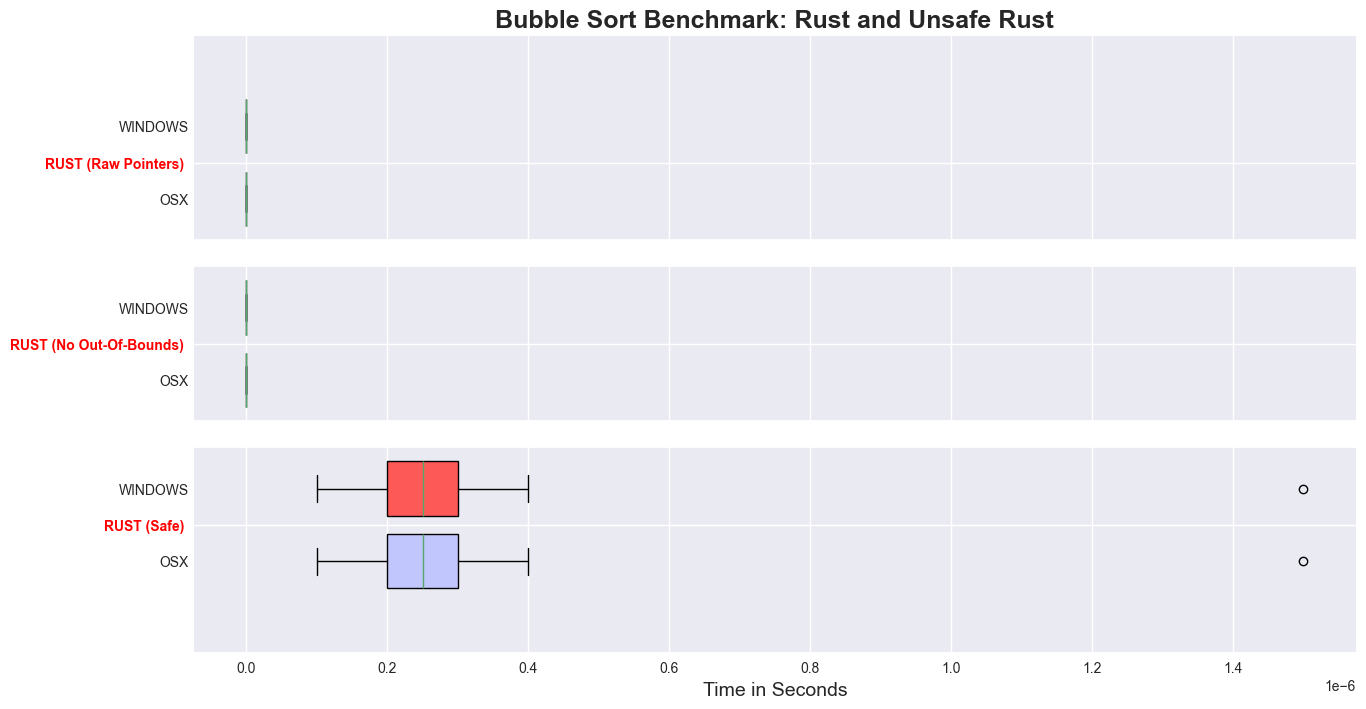

In [81]:
# GRAPH 2: Benchmarking Unsafe vs Safe Rust -- Revisiting Bubble Sort
# RUST, RUST_OOB, RUST_RAW
HEADERS = ["RUST", "RUST_OOB", "RUST_RAW"]
df_win32 = pl.read_csv("bubble-win32.csv").select(HEADERS)
df_osx = pl.read_csv("bubble-win32.csv").select(HEADERS)

fig, ax = plt.subplots(figsize=(15, 8))

win_plot = ax.boxplot(df_win32, orientation="horizontal", patch_artist=True,
           label=["RUST", "RUST (No OOB)", "RUST (Raw Pointers)"], positions=[0.2, 1.2, 2.2], widths=[0.3, 0.3, 0.3])
osx_plot = ax.boxplot(df_win32, orientation="horizontal", patch_artist=True,
           label=["RUST", "RUST (No OOB)", "RUST (Raw Pointers)"], positions=[-0.2, 0.8, 1.8], widths=[0.3, 0.3, 0.3])

for header, box in zip(win_plot["boxes"],):
    box.set_facecolor("xkcd:grapefruit")

for header, box in osx_plot["boxes"]:
    box.set_facecolor("xkcd:light periwinkle")

ax.axhline(y=0.5, color="white", lw=20)
ax.axhline(y=1.5, color="white", lw=20)

ax.set_yticks([0.2, -0.2, 1.2, 0.8, 2.2, 1.8], minor=True)
ax.set_yticklabels(["WINDOWS", "OSX", "WINDOWS", "OSX", "WINDOWS", "OSX"],
                   minor=True, fontweight="bold", color="r", fontsize=12)
ax.set_yticks(range(3))
ax.set_yticklabels(["RUST (Safe)", "RUST (No Out-Of-Bounds)", "RUST (Raw Pointers)"], fontsize=10, color="red", fontweight="bold");
ax.set_title("Bubble Sort Benchmark: Rust and Unsafe Rust", fontsize=18, fontweight="bold")
ax.set_xlabel("Time in Seconds", fontsize=14);